In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\msi\\Desktop\\Automobile.csv')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [18]:
df.notnull()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,True
394,True,True,True,True,True,True,True,True,True
395,True,True,True,True,True,True,True,True,True
396,True,True,True,True,True,True,True,True,True


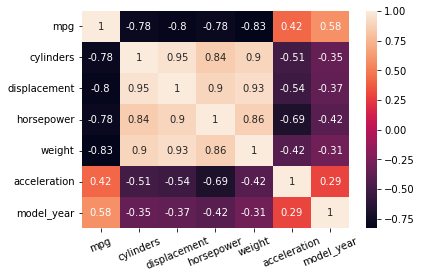

In [3]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.xticks(rotation=383)
plt.show()

In [4]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [5]:
# Qualitative into Quantitative 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['origin']=le.fit_transform(df['origin'])
df['origin'].value_counts()

2    249
1     79
0     70
Name: origin, dtype: int64

In [6]:
df01 = df[df['origin']!=2]
df01['origin'].value_counts()

1    79
0    70
Name: origin, dtype: int64

In [20]:
# Defining x and y
# y usse select kiya jaata hai jisse prediction krwana rheta hai
# x vo hota hai jiske base pe predict ho rha hai 
# example land ka price isme land x and price y

x = df01.iloc[:,1:3] # Independent Variable , Input , features
y = df01['origin'] # dependent variable , output , target , level
x.shape , y.shape

((149, 2), (149,))

In [21]:
y.head()

14    1
18    1
19    0
20    0
21    0
Name: origin, dtype: int32

In [22]:
x.head()

,mpg,cylinders
14,24.0,4
18,27.0,4
19,26.0,4
20,25.0,4
21,24.0,4


In [23]:
# Split the x and y in train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((111, 2), (38, 2), (111,), (38,))

In [24]:
# Import algorithm

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [25]:
x_train

,mpg,cylinders
177,23.0,4
18,27.0,4
186,27.0,4
78,21.0,4
145,32.0,4
...,...,...
118,24.0,4
235,26.0,4
329,44.6,4
171,24.0,4


In [26]:
y_train

177    0
18     1
186    0
78     0
145    1
      ..
118    0
235    1
329    1
171    1
309    0
Name: origin, Length: 111, dtype: int32

In [27]:
# Train the model
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
# Prediction through model

y_pred_lr=lr.predict(x_test)
y_pred_lr

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [29]:
y_pred_lr[:5],y_test.values[:5]

(array([1, 0, 0, 1, 1]), array([1, 1, 0, 1, 1]))

In [30]:
# Evaluation
'''1. Confusion matrix
   2. Accuracy score 
   3. Classification Report'''
# Model Overfitting : 1.0
# Model Underfitting : 0.5 
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6486486486486487
0.6052631578947368


In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred_lr,y_test))
print(classification_report(y_pred_lr,y_test))
print(f'model_score-{lr.score(x_test,y_test)}')
print(f'accuracy_score={accuracy_score(y_pred_lr,y_test)}')

[[ 9 11]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.56      0.78      0.65        18

    accuracy                           0.61        38
   macro avg       0.63      0.61      0.60        38
weighted avg       0.63      0.61      0.60        38

model_score-0.6052631578947368
accuracy_score=0.6052631578947368


In [32]:
# Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[1 0 0 0 1]Actual_y[1 1 0 1 1]
[[ 8 11]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        19
           1       0.56      0.74      0.64        19

    accuracy                           0.58        38
   macro avg       0.59      0.58      0.57        38
weighted avg       0.59      0.58      0.57        38

0.5789473684210527


In [33]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[1 0 0 0 1]Actual_y[1 1 0 1 1]
[[ 8  8]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.68      0.77      0.72        22

    accuracy                           0.66        38
   macro avg       0.65      0.64      0.64        38
weighted avg       0.65      0.66      0.65        38

0.6578947368421053


In [34]:
# K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[1 0 0 1 1]Actual_y[1 1 0 1 1]
[[ 7  8]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.68      0.74      0.71        23

    accuracy                           0.63        38
   macro avg       0.61      0.60      0.60        38
weighted avg       0.62      0.63      0.63        38

0.631578947368421


In [35]:
'''Naive Bayes
1.Gaussian
2.Bernoulli
3.Multinomial'''


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[0 0 0 0 0]Actual_y[1 1 0 1 1]
[[10 19]
 [ 3  6]]
              precision    recall  f1-score   support

           0       0.77      0.34      0.48        29
           1       0.24      0.67      0.35         9

    accuracy                           0.42        38
   macro avg       0.50      0.51      0.41        38
weighted avg       0.64      0.42      0.45        38

0.42105263157894735


In [36]:
# 2 Bernoulli

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[0 0 0 0 0]Actual_y[1 1 0 1 1]
[[13 25]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        38
           1       0.00      0.00      0.00         0

    accuracy                           0.34        38
   macro avg       0.50      0.17      0.25        38
weighted avg       1.00      0.34      0.51        38

0.34210526315789475


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# 3. Multinomial
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[0 0 0 1 1]Actual_y[1 1 0 1 1]
[[11 18]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.85      0.38      0.52        29
           1       0.28      0.78      0.41         9

    accuracy                           0.47        38
   macro avg       0.56      0.58      0.47        38
weighted avg       0.71      0.47      0.50        38

0.47368421052631576


In [39]:
# Support Vector Machine
# Kernel - poly,linear,RBF(Radial Basis Function)
from sklearn.svm import SVC
svcp=SVC(kernel='poly',degree = 2 , C = .1 )
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[1 0 0 1 1]Actual_y[1 1 0 1 1]
[[ 8 10]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.60      0.75      0.67        20

    accuracy                           0.61        38
   macro avg       0.61      0.60      0.59        38
weighted avg       0.61      0.61      0.60        38

0.6052631578947368


In [40]:
from sklearn.svm import SVC
svcp=SVC(kernel='linear',degree = 2 , C = .1 )
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[1 0 0 1 1]Actual_y[1 1 0 1 1]
[[ 8 10]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.60      0.75      0.67        20

    accuracy                           0.61        38
   macro avg       0.61      0.60      0.59        38
weighted avg       0.61      0.61      0.60        38

0.6052631578947368


In [41]:
from sklearn.svm import SVC
svcp=SVC(kernel='rbf',degree = 2 , C = .1 )
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'Predicted_y{y_pred[:5]}Actual_y{y_test.values[:5]}')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Predicted_y[1 0 0 1 1]Actual_y[1 1 0 1 1]
[[ 8 10]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.60      0.75      0.67        20

    accuracy                           0.61        38
   macro avg       0.61      0.60      0.59        38
weighted avg       0.61      0.61      0.60        38

0.6052631578947368
